In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
import os
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/earthquake.csv')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-27T03:52:15.750Z,36.974998,-121.046166,7.590000,1.96,md,27.0,105.0,0.0545,0.16,...,2022-12-27T04:26:11.533Z,"20km WSW of Los Banos, CA",earthquake,0.52,1.000,0.170,25.0,automatic,nc,nc
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,mb,21.0,133.0,4.1790,0.70,...,2022-12-27T04:05:32.040Z,south of Tonga,earthquake,6.69,1.925,0.141,16.0,reviewed,us,us
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,ml,NaN,NaN,NaN,0.53,...,2022-12-27T03:43:30.916Z,"6 km SE of Kasilof, Alaska",earthquake,NaN,2.000,NaN,NaN,automatic,ak,ak
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,ml,NaN,NaN,NaN,0.37,...,2022-12-27T03:39:23.482Z,"63 km WNW of Happy Valley, Alaska",earthquake,NaN,0.700,NaN,NaN,automatic,ak,ak
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,mb,49.0,48.0,10.6010,0.64,...,2022-12-27T03:57:38.040Z,"110 km SW of Jinchang, China",earthquake,10.15,1.939,0.079,48.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,ml,NaN,NaN,NaN,0.74,...,2022-12-15T01:43:46.177Z,"91 km SSE of Kokhanok, Alaska",earthquake,NaN,0.200,NaN,NaN,reviewed,ak,ak
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,mb,46.0,69.0,1.9820,0.92,...,2022-12-24T00:51:13.040Z,Kermadec Islands region,earthquake,9.44,1.818,0.084,47.0,reviewed,us,us
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,mb,91.0,37.0,2.4110,0.76,...,2022-12-24T00:19:26.107Z,"22 km ENE of Cortes, Philippines",earthquake,8.28,6.102,0.044,165.0,reviewed,us,us
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,ml,NaN,NaN,NaN,0.36,...,2022-12-12T22:21:18.648Z,"18 km NW of Fishhook, Alaska",earthquake,NaN,0.700,NaN,NaN,reviewed,ak,ak


Data preproccessing

Taking only the required part that is place lat long depth mag and place

In [3]:
df = df[['time', 'latitude', 'longitude', 'depth', 'mag', 'place']]
df_1=df

In [4]:
df

,time,latitude,longitude,depth,mag,place
0,2022-12-27T03:52:15.750Z,36.974998,-121.046166,7.590000,1.96,"20km WSW of Los Banos, CA"
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,south of Tonga
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,"6 km SE of Kasilof, Alaska"
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,"63 km WNW of Happy Valley, Alaska"
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,"110 km SW of Jinchang, China"
...,...,...,...,...,...,...
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,"91 km SSE of Kokhanok, Alaska"
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,Kermadec Islands region
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,"22 km ENE of Cortes, Philippines"
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,"18 km NW of Fishhook, Alaska"


In [5]:
newdf = df['place'].str.split(', ', expand=True) #obly states
newdf

,0,1,2
0,20km WSW of Los Banos,CA,None
1,south of Tonga,None,None
2,6 km SE of Kasilof,Alaska,None
3,63 km WNW of Happy Valley,Alaska,None
4,110 km SW of Jinchang,China,None
...,...,...,...
10571,91 km SSE of Kokhanok,Alaska,None
10572,Kermadec Islands region,None,None
10573,22 km ENE of Cortes,Philippines,None
10574,18 km NW of Fishhook,Alaska,None


In [6]:
df['place'] = newdf[1]
df2=df

<ipython-input-6-0c83933773ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['place'] = newdf[1]


In [7]:
df


,time,latitude,longitude,depth,mag,place
0,2022-12-27T03:52:15.750Z,36.974998,-121.046166,7.590000,1.96,CA
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,None
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,Alaska
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,Alaska
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,China
...,...,...,...,...,...,...
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,Alaska
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,None
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,Philippines
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,Alaska


In [8]:
df = df.sort_values('time', ascending=True)
df

,time,latitude,longitude,depth,mag,place
10575,2022-11-27T04:41:46.900Z,19.169001,-155.477173,31.469999,2.37,Hawaii
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,Alaska
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,Philippines
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,None
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,Alaska
...,...,...,...,...,...,...
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,China
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,Alaska
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,Alaska
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,None


In [9]:
df['time'] = df['time'].str[0:10]
df3=df
df#splitting time to days/month/year

,time,latitude,longitude,depth,mag,place
10575,2022-11-27,19.169001,-155.477173,31.469999,2.37,Hawaii
10574,2022-11-27,61.836600,-149.519800,44.800000,1.30,Alaska
10573,2022-11-27,9.361600,126.378000,56.023000,5.00,Philippines
10572,2022-11-27,-31.098400,-178.797600,10.000000,5.00,None
10571,2022-11-27,58.654700,-154.285300,10.700000,1.60,Alaska
...,...,...,...,...,...,...
4,2022-12-27,37.948100,101.145900,10.000000,4.70,China
3,2022-12-27,60.097900,-152.827800,112.800000,2.30,Alaska
2,2022-12-27,60.304500,-151.181200,42.400000,2.00,Alaska
1,2022-12-27,-25.358900,-174.903900,10.000000,5.00,None


Taking out places as we will take in places as final output as latitude longitude is at last places we take means of these places

In [10]:
df_coords = df[['place', 'latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords

,place,latitude,longitude
0,Afghanistan,36.346400,70.808343
1,Alaska,59.555644,-154.325357
2,Aleutian Islands,51.944346,-42.337504
3,Algeria,36.451200,3.116100
4,Antigua and Barbuda,17.650800,-60.952583
...,...,...,...
92,Vanuatu,-15.538331,167.827508
93,Wallis and Futuna,-16.513300,-176.979150
94,Washington,47.111054,-121.851426
95,Wyoming,44.715605,-110.728600


As you can see alaska is -154 in df_cord and -152 in df so we can grp it.

In [11]:
#inner join the table as place being the point
df = df[['time', 'depth', 'mag', 'place']]#remove long and lat
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])
df5=df
df

,time,depth,mag,place,latitude,longitude
0,2022-11-27,31.469999,2.37,Hawaii,19.344094,-155.452834
1,2022-11-27,10.230000,1.96,Hawaii,19.344094,-155.452834
2,2022-11-27,32.610001,1.83,Hawaii,19.344094,-155.452834
3,2022-11-27,32.250000,2.14,Hawaii,19.344094,-155.452834
4,2022-11-27,28.840000,2.17,Hawaii,19.344094,-155.452834
...,...,...,...,...,...,...
9567,2022-12-22,8.587000,2.50,Ohio,41.109000,-83.444600
9568,2022-12-24,11.760000,2.52,Mississippi,34.673000,-88.514833
9569,2022-12-26,10.000000,5.50,Ethiopia,14.428300,39.910250
9570,2022-12-26,9.151000,4.60,Ethiopia,14.428300,39.910250


Using **rolling windows** to take out mean of earthquake over a period of time so that we can predict it

A common time-series model assumption is that the coefficients are constant with respect to time. Checking for instability amounts to examining whether the coefficients are time-invariant.

In [12]:
# We will take a rolling window of size 7 as a week is a good number 7,14,21

eq_tmp = df.copy()


# loop through each zone and apply MA
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()

    temp_df['Mdep_21'] = temp_df['depth'].rolling(window=21,center=False).mean()
    temp_df['Mdep_14'] = temp_df['depth'].rolling(window=14,center=False).mean()
    temp_df['Mdep_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['Mmag_21'] = temp_df['mag'].rolling(window=21,center=False).mean()
    temp_df['Mmag_14'] = temp_df['mag'].rolling(window=14,center=False).mean()
    temp_df['Mmag_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'Mmag_7'].shift(-9)##donot predict last 8 days as rolling window might be wrong for 28-30

    #days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)

    eq_data_last_days_out.append(temp_df.tail(9))#days we didnot count so we will predict these days

    eq_data.append(temp_df)

eq_data

[            time  depth   mag place   latitude  longitude   Mdep_21   Mdep_14  \
 4580  2022-11-27   1.89  0.77    CA  37.098262 -120.64363       NaN       NaN   
 4581  2022-11-27   3.13  1.73    CA  37.098262 -120.64363       NaN       NaN   
 4582  2022-11-27   9.75  1.22    CA  37.098262 -120.64363       NaN       NaN   
 4583  2022-11-27   4.33  1.65    CA  37.098262 -120.64363       NaN       NaN   
 4584  2022-11-27   6.62  0.81    CA  37.098262 -120.64363       NaN       NaN   
 ...          ...    ...   ...   ...        ...        ...       ...       ...   
 7396  2022-12-27   2.70  1.33    CA  37.098262 -120.64363  4.852857  5.480000   
 7397  2022-12-27   0.98  1.06    CA  37.098262 -120.64363  4.824762  5.027143   
 7398  2022-12-27  17.64  1.76    CA  37.098262 -120.64363  5.623810  6.220000   
 7399  2022-12-27   9.98  0.97    CA  37.098262 -120.64363  6.009524  6.847143   
 7400  2022-12-27   7.59  1.96    CA  37.098262 -120.64363  6.294762  7.020000   
 
         Mdep_

In [13]:

eq_all = pd.concat(eq_data)
eq_all#convert list to dataframe

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
4580,2022-11-27,1.89,0.77,CA,37.098262,-120.643630,NaN,NaN,NaN,NaN,NaN,NaN,1.131429
4581,2022-11-27,3.13,1.73,CA,37.098262,-120.643630,NaN,NaN,NaN,NaN,NaN,NaN,1.030000
4582,2022-11-27,9.75,1.22,CA,37.098262,-120.643630,NaN,NaN,NaN,NaN,NaN,NaN,1.020000
4583,2022-11-27,4.33,1.65,CA,37.098262,-120.643630,NaN,NaN,NaN,NaN,NaN,NaN,1.008571
4584,2022-11-27,6.62,0.81,CA,37.098262,-120.643630,NaN,NaN,NaN,NaN,NaN,NaN,1.192857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,2022-12-24,10.00,4.50,Canada,54.710986,-123.517496,7.989381,8.803357,9.865714,1.761429,1.740714,1.890000,NaN
9176,2022-12-24,10.00,4.00,Canada,54.710986,-123.517496,7.122714,9.567643,9.101429,1.856667,1.941429,2.314286,NaN
9177,2022-12-25,13.14,2.80,Canada,54.710986,-123.517496,7.496048,10.413357,11.031429,1.937619,2.070000,2.418571,NaN
9178,2022-12-26,15.30,3.00,Canada,54.710986,-123.517496,8.010333,11.523357,13.251429,1.985238,2.187143,2.844286,NaN


In [14]:
#rolling windows has a lot of NAN from the 1st part removing it
# remove any NaN fields
eq_all=eq_all.dropna()
eq_all

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
4600,2022-11-27,9.95,0.85,CA,37.098262,-120.643630,7.293810,8.040000,9.894286,0.980000,0.925000,0.657143,1.297143
4601,2022-11-27,14.40,1.01,CA,37.098262,-120.643630,7.889524,8.712143,10.324286,0.991429,0.857143,0.727143,1.204286
4602,2022-11-27,3.29,2.63,CA,37.098262,-120.643630,7.897143,8.800714,8.814286,1.034286,0.968571,0.962857,1.168571
4603,2022-11-27,15.33,1.87,CA,37.098262,-120.643630,8.162857,9.165000,9.222857,1.065238,1.032143,1.174286,1.168571
4604,2022-11-27,6.79,1.82,CA,37.098262,-120.643630,8.280000,8.913571,8.231429,1.073333,1.095000,1.357143,1.097143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,2022-12-10,-0.37,1.99,Canada,54.710986,-123.517496,9.184381,7.444071,5.312429,1.808095,1.804286,1.520000,1.890000
9167,2022-12-11,10.00,1.60,Canada,54.710986,-123.517496,9.311952,7.801214,6.441000,1.746190,1.761429,1.605714,2.314286
9168,2022-12-12,12.60,1.60,Canada,54.710986,-123.517496,9.923857,7.051214,7.741000,1.764762,1.697143,1.591429,2.418571
9169,2022-12-14,15.35,1.03,Canada,54.710986,-123.517496,10.331000,6.133357,10.033857,1.747143,1.627857,1.568571,2.844286


In [15]:
eq_data_last_days_out = pd.concat(eq_data_last_days_out)



In [16]:
eq_data_last_days_out


,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
7392,2022-12-26,2.11,0.88,CA,37.098262,-120.643630,3.882857,4.615714,4.897143,0.978095,1.093571,0.994286,NaN
7393,2022-12-26,29.42,1.05,CA,37.098262,-120.643630,5.153810,6.602857,8.361429,0.995714,1.092857,0.995714,NaN
7394,2022-12-26,0.60,1.00,CA,37.098262,-120.643630,5.083333,6.257143,6.871429,0.984762,1.082857,0.968571,NaN
7395,2022-12-27,0.26,1.76,CA,37.098262,-120.643630,4.795238,5.850000,6.628571,1.014286,1.077143,1.188571,NaN
7396,2022-12-27,2.70,1.33,CA,37.098262,-120.643630,4.852857,5.480000,6.890000,1.054286,1.108571,1.211429,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,2022-12-24,10.00,4.50,Canada,54.710986,-123.517496,7.989381,8.803357,9.865714,1.761429,1.740714,1.890000,NaN
9176,2022-12-24,10.00,4.00,Canada,54.710986,-123.517496,7.122714,9.567643,9.101429,1.856667,1.941429,2.314286,NaN
9177,2022-12-25,13.14,2.80,Canada,54.710986,-123.517496,7.496048,10.413357,11.031429,1.937619,2.070000,2.418571,NaN
9178,2022-12-26,15.30,3.00,Canada,54.710986,-123.517496,8.010333,11.523357,13.251429,1.985238,2.187143,2.844286,NaN


In [17]:
eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['Mmag_21'])]
eq_data_last_days_out

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
7392,2022-12-26,2.11,0.88,CA,37.098262,-120.643630,3.882857,4.615714,4.897143,0.978095,1.093571,0.994286,NaN
7393,2022-12-26,29.42,1.05,CA,37.098262,-120.643630,5.153810,6.602857,8.361429,0.995714,1.092857,0.995714,NaN
7394,2022-12-26,0.60,1.00,CA,37.098262,-120.643630,5.083333,6.257143,6.871429,0.984762,1.082857,0.968571,NaN
7395,2022-12-27,0.26,1.76,CA,37.098262,-120.643630,4.795238,5.850000,6.628571,1.014286,1.077143,1.188571,NaN
7396,2022-12-27,2.70,1.33,CA,37.098262,-120.643630,4.852857,5.480000,6.890000,1.054286,1.108571,1.211429,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,2022-12-24,10.00,4.50,Canada,54.710986,-123.517496,7.989381,8.803357,9.865714,1.761429,1.740714,1.890000,NaN
9176,2022-12-24,10.00,4.00,Canada,54.710986,-123.517496,7.122714,9.567643,9.101429,1.856667,1.941429,2.314286,NaN
9177,2022-12-25,13.14,2.80,Canada,54.710986,-123.517496,7.496048,10.413357,11.031429,1.937619,2.070000,2.418571,NaN
9178,2022-12-26,15.30,3.00,Canada,54.710986,-123.517496,8.010333,11.523357,13.251429,1.985238,2.187143,2.844286,NaN


In [18]:
eq_all['mag_outcome'].value_counts()

mag_outcome
1.428571    26
1.214286    26
1.571429    24
1.285714    24
1.357143    24
            ..
2.230000     1
2.217143     1
2.161429     1
2.095714     1
2.930000     1
Name: count, Length: 3502, dtype: int64

In [19]:
#considered magnitude above 2.5 as dangerous hence prediction outcome as '1' elso '0'.
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
eq_all['mag_outcome'].value_counts()

<ipython-input-19-83cfda7d5cbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)


mag_outcome
0    8108
1     329
Name: count, dtype: int64

In [20]:
#therefore although data is 95% 0 and 5% 1

In [21]:
df_features=eq_all

In [22]:
# splitting traing and testing dataset with trainging size = 70% and test = 30%
req=['depth','Mdep_21','Mdep_14','Mdep_7','Mmag_21','Mmag_14','Mmag_7']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features[req], df_features['mag_outcome'], test_size=0.3, random_state=42)

In [23]:
X_train

,depth,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7
4102,5.78,13.322857,16.890714,22.478571,1.199048,0.922857,0.914286
6517,8.48,6.247143,3.814286,4.962857,0.801905,0.805000,0.904286
3407,12.30,31.884143,24.244786,7.451429,1.687619,1.496429,1.248571
6543,14.16,5.935238,6.922143,8.227143,0.966190,0.995714,0.962857
98,0.93,-0.980952,-1.456429,-1.392857,2.007619,1.986429,1.865714
...,...,...,...,...,...,...,...
2226,55.40,40.570000,28.776429,32.785714,1.096667,0.930714,1.228571
1683,41.60,32.221714,36.871429,47.042857,1.377143,1.478571,1.671429
1882,25.50,31.566190,18.135000,17.427143,1.334762,1.202143,0.990000
5488,6.27,6.628095,5.842857,6.381429,0.800000,0.705000,0.891429


In [24]:
X_test

,depth,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7
5838,6.790000,5.183810,4.339286,2.597143,1.053333,1.021429,0.944286
3648,1.590000,29.235238,34.124286,32.684286,0.962857,0.814286,0.424286
1974,0.000000,33.494762,32.892143,28.298571,1.246667,1.234286,0.825714
2849,3.480000,54.872857,50.078571,40.101429,1.391905,1.116429,1.012857
6175,8.100000,4.920952,5.772143,5.787143,0.890952,0.940714,0.958571
...,...,...,...,...,...,...,...
4017,0.000000,25.779524,33.106429,19.904286,0.985714,1.059286,0.854286
5798,16.640000,7.184762,7.873571,10.371429,1.310476,1.191429,1.304286
5179,2.740000,9.711905,10.567143,10.080000,0.993333,0.938571,0.788571
6866,16.160000,10.478571,11.338571,11.565714,1.711905,1.735000,1.834286


In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5905, 7) (2532, 7) (5905,) (2532,)


In [30]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.regularizers import L1L2
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,BatchNormalization,Dropout



model_mlp = Sequential()
model_mlp.add(Dense(80, activation='relu', kernel_regularizer=L1L2(l1=1e-4, l2=1e-2), input_dim=X_train.shape[1]))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(20, activation='relu', kernel_regularizer=L1L2(l1=1e-2, l2=1e-1)))
model_mlp.add(Dense(1, activation='sigmoid'))
model_mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                640       
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1620      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2281 (8.91 KB)
Trainable params: 2281 (8.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:

mlp_history = model_mlp.fit(X_train.values, y_train, validation_data=(X_test.values, y_test), epochs=20, verbose=1)
#10 epochs is good
#15 is questionable

Epoch 1/20
185/185 [==============================] - 7s 8ms/step - loss: 3.1405 - auc: 0.3761 - val_loss: 1.4788 - val_auc: 0.3266
Epoch 2/20
185/185 [==============================] - 1s 4ms/step - loss: 1.0297 - auc: 0.3224 - val_loss: 0.6603 - val_auc: 0.3089
Epoch 3/20
185/185 [==============================] - 1s 5ms/step - loss: 0.5817 - auc: 0.4140 - val_loss: 0.4835 - val_auc: 0.3416
Epoch 4/20
185/185 [==============================] - 1s 7ms/step - loss: 0.4176 - auc: 0.4335 - val_loss: 0.3253 - val_auc: 0.3512
Epoch 5/20
185/185 [==============================] - 1s 6ms/step - loss: 0.3215 - auc: 0.4752 - val_loss: 0.2603 - val_auc: 0.6254
Epoch 6/20
185/185 [==============================] - 1s 5ms/step - loss: 0.2629 - auc: 0.5525 - val_loss: 0.2320 - val_auc: 0.3552
Epoch 7/20
185/185 [==============================] - 1s 4ms/step - loss: 0.2399 - auc: 0.5224 - val_loss: 0.1964 - val_auc: 0.6604
Epoch 8/20
185/185 [==============================] - 1s 5ms/step - loss: 0.

In [32]:
model_mlp.evaluate(X_test, y_test)

80/80 [==============================] - 0s 2ms/step - loss: 0.1407 - auc: 0.6839


[0.14072637259960175, 0.6839096546173096]

In [33]:
y_test.shape

(2532,)

In [34]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model_mlp.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(y_test.values.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(y_test.values.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)


Variance: 0.087908
R2 Score: 0.087908


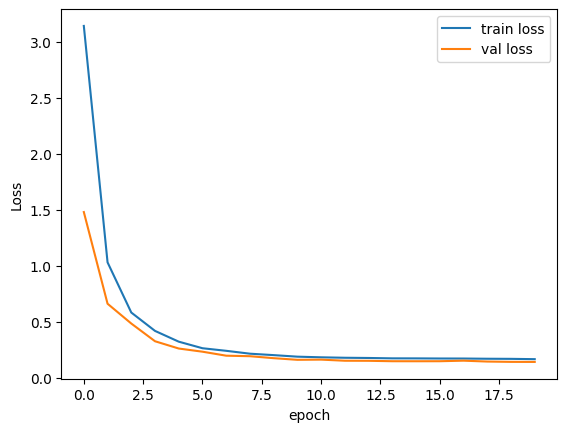

In [35]:
plt.plot(mlp_history.history['loss'], label='train loss')
plt.plot(mlp_history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [36]:
from sklearn import metrics
predicted = model_mlp.predict(X_test)
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

80/80 [==============================] - 0s 1ms/step
Root Mean Squared Error: 0.1730012928586415
R-squared : 0.08783963783182991


0.6877626499838371
AUC: 0.6878


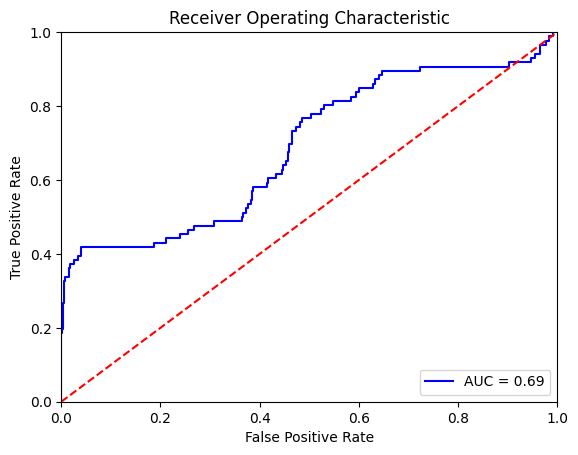

In [37]:
#taken from net
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred= predicted

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [38]:
predicted

array([[0.02216286],
       [0.03920939],
       [0.04016567],
       ...,
       [0.02490412],
       [0.02626457],
       [0.02922312]], dtype=float32)

CNN TRY

In [39]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (5905, 7, 1)
Validation set shape (2532, 7, 1)


In [40]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
model_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 64)             0         
 D)                                                              
                                                                 
 dense_3 (Dense)             (None, 3, 50)             3250      
                                                                 
 dense_4 (Dense)             (None, 3, 1)              51        
                                                                 
Total params: 3493 (13.64 KB)
Trainable params: 3493 (13.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **With dropout**

In [41]:
model = Sequential()
model.add(Dense(750, kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu",input_shape=(7,)))
model.add(BatchNormalization())
model.add(Dense(512, kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(200,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(60,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 750)               6000      
                                                                 
 batch_normalization (Batch  (None, 750)               3000      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (None, 512)               384512    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 200)               102600    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                      

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])

In [43]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)
history1 =model.fit(X_train, y_train, validation_split=0.35, shuffle=True, epochs=100,batch_size=2000,callbacks=[callback])

Epoch 1/100
2/2 [==============================] - 4s 312ms/step - loss: 120.6146 - auc: 0.4512 - val_loss: 114.2348 - val_auc: 0.6054
Epoch 2/100
2/2 [==============================] - 0s 43ms/step - loss: 112.2178 - auc: 0.4905 - val_loss: 106.1690 - val_auc: 0.3836
Epoch 3/100
2/2 [==============================] - 0s 54ms/step - loss: 104.2684 - auc: 0.4725 - val_loss: 98.5741 - val_auc: 0.3381
Epoch 4/100
2/2 [==============================] - 0s 53ms/step - loss: 96.7637 - auc: 0.4848 - val_loss: 91.4215 - val_auc: 0.3213
Epoch 5/100
2/2 [==============================] - 0s 54ms/step - loss: 89.6936 - auc: 0.5056 - val_loss: 84.6928 - val_auc: 0.3119
Epoch 6/100
2/2 [==============================] - 0s 59ms/step - loss: 83.0450 - auc: 0.4860 - val_loss: 78.3733 - val_auc: 0.3051
Epoch 7/100
2/2 [==============================] - 0s 54ms/step - loss: 76.8099 - auc: 0.4899 - val_loss: 72.4511 - val_auc: 0.3018
Epoch 8/100
2/2 [==============================] - 0s 53ms/step - loss

80/80 [==============================] - 0s 2ms/step
0.6569910057236303
AUC: 0.657


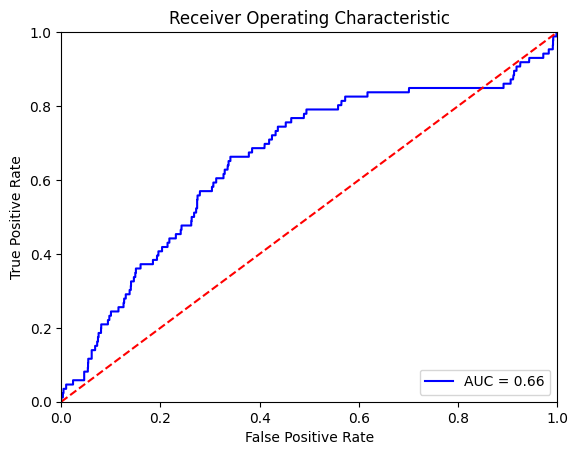

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred= model.predict(X_test)

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [45]:
df_predict=eq_data_last_days_out
df_predict.shape
preds=model.predict(df_predict[req])

7/7 [==============================] - 0s 2ms/step


In [46]:
live_set = df_predict[['time', 'place', 'latitude', 'longitude']]
live_set.loc[:,'quake'] = preds
live_set

<ipython-input-46-a476d2d42491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live_set.loc[:,'quake'] = preds


,time,place,latitude,longitude,quake
7392,2022-12-26,CA,37.098262,-120.643630,0.100553
7393,2022-12-26,CA,37.098262,-120.643630,0.100864
7394,2022-12-26,CA,37.098262,-120.643630,0.100545
7395,2022-12-27,CA,37.098262,-120.643630,0.100542
7396,2022-12-27,CA,37.098262,-120.643630,0.100561
...,...,...,...,...,...
9175,2022-12-24,Canada,54.710986,-123.517496,0.100649
9176,2022-12-24,Canada,54.710986,-123.517496,0.100649
9177,2022-12-25,Canada,54.710986,-123.517496,0.100688
9178,2022-12-26,Canada,54.710986,-123.517496,0.100716


In [47]:
#grouping it
live_set = live_set.groupby(['time', 'place'], as_index=False).mean()
live_set


,time,place,latitude,longitude,quake
0,2022-12-09,Philippines,10.354810,124.543933,0.101082
1,2022-12-11,Montana,44.762553,-110.913086,0.100552
2,2022-12-11,Philippines,10.354810,124.543933,0.100737
3,2022-12-12,Montana,44.762553,-110.913086,0.100604
4,2022-12-12,Wyoming,44.715605,-110.728600,0.100584
...,...,...,...,...,...
105,2022-12-27,Indonesia,-4.318863,120.748293,0.102089
106,2022-12-27,Japan,34.994066,137.508375,0.101456
107,2022-12-27,Nevada,37.980819,-117.597709,0.100653
108,2022-12-27,New Mexico,31.810489,-104.413491,0.100593


In [48]:
# increment date to include DAYS_OUT_TO_PREDICT
live_set['time']= pd.to_datetime(live_set['time'],format='%Y-%m-%d')
live_set['time'] = live_set['time'] + pd.to_timedelta(9,unit='d')

live_set

,time,place,latitude,longitude,quake
0,2022-12-18,Philippines,10.354810,124.543933,0.101082
1,2022-12-20,Montana,44.762553,-110.913086,0.100552
2,2022-12-20,Philippines,10.354810,124.543933,0.100737
3,2022-12-21,Montana,44.762553,-110.913086,0.100604
4,2022-12-21,Wyoming,44.715605,-110.728600,0.100584
...,...,...,...,...,...
105,2023-01-05,Indonesia,-4.318863,120.748293,0.102089
106,2023-01-05,Japan,34.994066,137.508375,0.101456
107,2023-01-05,Nevada,37.980819,-117.597709,0.100653
108,2023-01-05,New Mexico,31.810489,-104.413491,0.100593


In [ ]:
import datetime as dt
# giving out predictions from today
days = list(set([d for d in live_set['time'].astype(str) if d > dt.datetime.today().strftime('%Y-%m-%d')]))
days.sort()

# Predict NaN outcome value in earthquake for next day 1.
predict_day=days[1]
predict_day
z=pd.DataFrame (days, columns = ['time'])
z
z['time']= pd.to_datetime(z['time'],format='%Y-%m-%d')

In [ ]:
answer=pd.merge(left=live_set, right=z, how='inner', on=['time'])
answer

,time,place,latitude,longitude,quake
0,2022-12-28,Chile,-28.093655,-70.560722,0.168615
1,2022-12-28,New Mexico,31.810489,-104.413491,0.135289
2,2022-12-28,Oregon,43.970311,-122.321800,0.134044
3,2022-12-28,Philippines,10.354810,124.543933,0.163898
4,2022-12-28,Texas,31.577576,-103.562881,0.135777
...,...,...,...,...,...
80,2023-01-05,Indonesia,-4.318863,120.748293,0.168615
81,2023-01-05,Japan,34.994066,137.508375,0.168611
82,2023-01-05,Nevada,37.980819,-117.597709,0.136697
83,2023-01-05,New Mexico,31.810489,-104.413491,0.135040


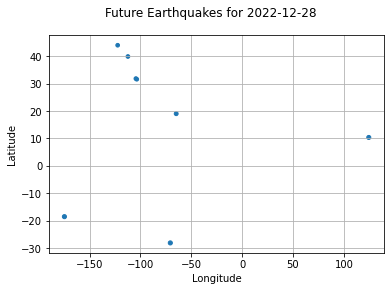

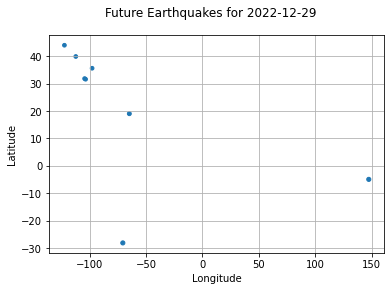

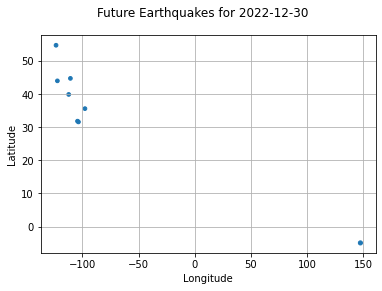

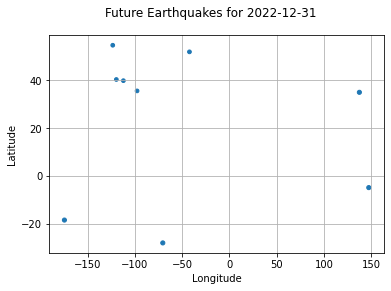

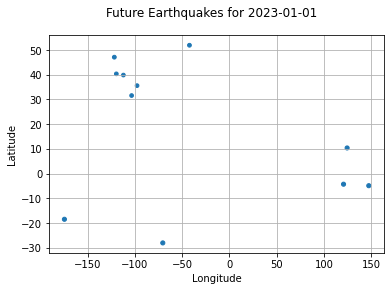

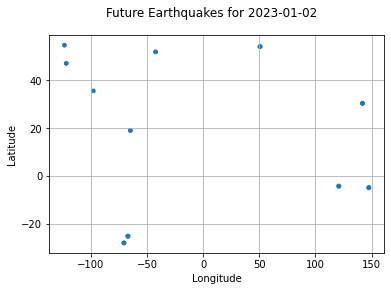

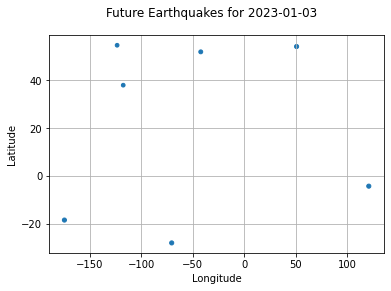

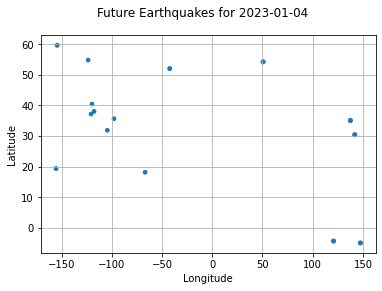

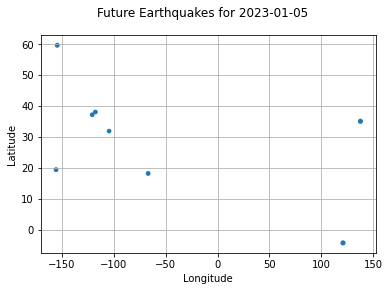

In [ ]:
#internet
for i in range(0,9):
    live_set_tmp = live_set[live_set['time'] == days[i]]
    plt.scatter(live_set_tmp['longitude'], live_set_tmp['latitude'], s=(live_set_tmp['quake'] * 100))
    plt.suptitle('Future Earthquakes for ' + days[i])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
from folium import Choropleth
from folium.plugins import HeatMap


#internet
#Reference for plot https://python-visualization.github.io/folium/quickstart.html & https://www.kaggle.com/code/cwthompson/volcano-making-a-map-of-volcanoes-using-folium/notebook

for i in range(0,9):
    live_set_tmp = live_set[live_set['time'] == days[i]]
    volcano_map = folium.Map()
    for i in range(0, live_set_tmp.shape[0]):
      volcano = live_set_tmp.iloc[i]
      folium.Marker([volcano['latitude'], volcano['longitude']], popup=volcano['place']).add_to(volcano_map)
    display(volcano_map)




